In [158]:
# Importing important tools
# Importing important tools
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import astropy.units as u
import astropy.constants as c
import matplotlib.pyplot as plt
from astropy.io import ascii
from scipy import optimize
from scipy import odr
import csv
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.lines as mlines


In [159]:
#Defining variables uploading data file
# Column Number    Name
# 0                Band
# 1                Frequency (GHz)
# 2                Wavelength (cm)
# 3                Flux (uJy)
# 4                Flux Error(uJy)

#Reading in data gotten from data reduction
drop_data=ascii.read("SWIRE_3_14_Data.csv") 
#Adding rest frequency to values (2.877 is the redshift found in Fan et al paper)
drop_data["Rest Frequency (GHz)"]=drop_data["Frequency(GHz)"]*(1+2.877)
# Looking at data table to show values
drop_data

Frequency(GHz),Wavelength(m),Flux (µJy),Error (µJy),Rest Frequency (GHz)
float64,float64,float64,float64,float64
1.4351,2.090446659,318.0,108.0,5.5638827
5.999273,0.500060591,36.2,4.7,23.259181420999997
15.08347,0.198893225,36.8,7.8,58.47861319


In [160]:
#Importing Data columns 
frequency = drop_data.columns[0].data # frequency of light
wavelength = drop_data.columns[1].data #wavelength of light
flux = drop_data.columns[2].data # Flux of source
error_flux = drop_data.columns[3].data #Error in flux of source
rest_frequency = drop_data.columns[4].data # Rest Frequency

# Exponent 1 - Before Dust Subtraction

In [161]:
#defining fit equations to determine best fit
def non_thermal(T,f):
    y = T*f**(-0.8) ## non thermal, the exponent is changed to find the best fit
    return y

def free_free(T,f):
    y = T*f**(-0.1) ## Free Free, this exponent remains the same
    return y

In [162]:
#Defining a total equation
def NT_FF_emission(T,f):
    y = T[0]*f**(-0.8)+T[1]*f**(-0.1)
    return y

#modeling equation labeling which oen you are with 1,2,3 etc.
modelNT_FF_emission = odr.Model(NT_FF_emission)

#Assigning the data to the fit
xdata1= rest_frequency
ydata1= flux
yerr1= error_flux
data1 = odr.RealData(xdata1,ydata1,sy=yerr1)

odrfit1 = odr.ODR(data1,modelNT_FF_emission,beta0=np.array([1000,100]),maxit=10000) #maxit is the amount of iterations it attempts

results1 = odrfit1.run()

results1.pprint()

# When looking at the results, Residual Variance is used to determine best fit
# the lowest variance is the best fit, compair each exponent used

Beta: [136.88815186  38.05632667]
Beta Std Error: [594.77979976  60.27660444]
Beta Covariance: [[55845.32303891 -5499.06544307]
 [-5499.06544307   573.55087309]]
Residual Variance: 6.334693595596337
Inverse Condition #: 0.11024797889546345
Reason(s) for Halting:
  Sum of squares convergence


In [163]:
def non_thermal_2(T,f):
    y = T*f**(-0.9) ## non thermal
    return y

def free_free_2(T,f):
    y = T*f**(-0.1) ## Free Free
    return y
#Defining free-free and non-thermal emission equations

In [164]:
def NT_FF_emission_2(T,f):
    y = T[0]*f**(-0.9)+T[1]*f**(-0.1)
    return y


modelNT_FF_emission_2 = odr.Model(NT_FF_emission_2)

xdata= rest_frequency
ydata= flux
yerr= error_flux
data = odr.RealData(xdata1,ydata1,sy=yerr1)

odrfit2 = odr.ODR(data,modelNT_FF_emission_2,beta0=np.array([1000,100]),maxit=10000) #maxit is the amount of iterations it attempts

results2 = odrfit2.run()

results2.pprint()

Beta: [202.13395036  37.17633855]
Beta Std Error: [720.0859362   53.04729433]
Beta Covariance: [[83723.14736883 -5945.47845661]
 [-5945.47845661   454.36342414]]
Residual Variance: 6.193314176701694
Inverse Condition #: 0.12607067160993374
Reason(s) for Halting:
  Sum of squares convergence


In [165]:
def non_thermal_3(T,f):
    y = T*f**(-1) ## non thermal
    return y

def free_free_3(T,f):
    y = T*f**(-0.1) ## Free Free
    return y
#Defining free-free and non-thermal emission equations

In [166]:
def NT_FF_emission_3(T,f):
    y = T[0]*f**(-1)+T[1]*f**(-0.1)
    return y


modelNT_FF_emission_3 = odr.Model(NT_FF_emission_3)

xdata1= rest_frequency
ydata1= flux
yerr1= error_flux
data1 = odr.RealData(xdata1,ydata1,sy=yerr1)

odrfit3 = odr.ODR(data1,modelNT_FF_emission_3,beta0=np.array([1000,100]),maxit=10000) #maxit is the amount of iterations it attempts

results3 = odrfit3.run()

results3.pprint()

Beta: [297.46480715  36.27680094]
Beta Std Error: [876.61262331  47.03635147]
Beta Covariance: [[127902.89764417  -6555.25629789]
 [ -6555.25629789    368.24104706]]
Residual Variance: 6.008071009309897
Inverse Condition #: 0.11478370895781301
Reason(s) for Halting:
  Sum of squares convergence


In [167]:
def non_thermal_4(T,f):
    y = T*f**(-1.1) ## non thermal
    return y

def free_free_4(T,f):
    y = T*f**(-0.1) ## Free Free
    return y
#Defining free-free and non-thermal emission equations

In [168]:
def NT_FF_emission_4(T,f):
    y = T[0]*f**(-1.1)+T[1]*f**(-0.1)
    return y


modelNT_FF_emission_4 = odr.Model(NT_FF_emission_4)

xdata1= rest_frequency
ydata1= flux
yerr1= error_flux
data1 = odr.RealData(xdata1,ydata1,sy=yerr1)

odrfit4 = odr.ODR(data1,modelNT_FF_emission_4,beta0=np.array([1000,100]),maxit=10000) #maxit is the amount of iterations it attempts

results4 = odrfit4.run()

results4.pprint()

Beta: [434.34221536  35.43287101]
Beta Std Error: [1066.89549473   41.79279757]
Beta Covariance: [[197225.90824744  -7300.33377057]
 [ -7300.33377057    302.63774272]]
Residual Variance: 5.7713816952022405
Inverse Condition #: 0.10143418477067093
Reason(s) for Halting:
  Sum of squares convergence


In [169]:
def non_thermal_5(T,f):
    y = T*f**(-1.2) ## non thermal
    return y

def free_free_5(T,f):
    y = T*f**(-0.1) ## Free Free
    return y
#Defining free-free and non-thermal emission equations

In [170]:
def NT_FF_emission_5(T,f):
    y = T[0]*f**(-1.2)+T[1]*f**(-0.1)
    return y


modelNT_FF_emission_5 = odr.Model(NT_FF_emission_5)

xdata1= rest_frequency
ydata1= flux
yerr1= error_flux
data1 = odr.RealData(xdata1,ydata1,sy=yerr1)

odrfit5 = odr.ODR(data1,modelNT_FF_emission_5,beta0=np.array([1000,100]),maxit=10000) #maxit is the amount of iterations it attempts

results5 = odrfit5.run()

results5.pprint()

Beta: [625.90941784  34.74873606]
Beta Std Error: [1292.17118758   37.05918551]
Beta Covariance: [[ 3.04798975e+05 -8.15387547e+03]
 [-8.15387547e+03  2.50706236e+02]]
Residual Variance: 5.478057724342764
Inverse Condition #: 0.08763241809979612
Reason(s) for Halting:
  Sum of squares convergence


In [171]:
def non_thermal_6(T,f):
    y = T*f**(-1.3) ## non thermal
    return y

In [172]:
def NT_FF_emission_6(T,f):
    y = T[0]*f**(-1.3)+T[1]*f**(-0.1)
    return y


modelNT_FF_emission_6 = odr.Model(NT_FF_emission_6)

xdata1= rest_frequency
ydata1= flux
yerr1= error_flux
data1 = odr.RealData(xdata1,ydata1,sy=yerr1)

odrfit6 = odr.ODR(data1,modelNT_FF_emission_6,beta0=np.array([1000,100]),maxit=10000) #maxit is the amount of iterations it attempts

results6 = odrfit6.run()

results6.pprint()

Beta: [885.04086664  34.34586482]
Beta Std Error: [1553.00493627   32.72416713]
Beta Covariance: [[ 4.70293165e+05 -9.09977993e+03]
 [-9.09977993e+03  2.08814282e+02]]
Residual Variance: 5.128342306243366
Inverse Condition #: 0.07443432262405535
Reason(s) for Halting:
  Sum of squares convergence


In [173]:
def non_thermal_7(T,f):
    y = T*f**(-1.4) ## non thermal
    return y

In [174]:
def NT_FF_emission_7(T,f):
    y = T[0]*f**(-1.4)+T[1]*f**(-0.1)
    return y


modelNT_FF_emission_7 = odr.Model(NT_FF_emission_7)

xdata1= rest_frequency
ydata1= flux
yerr1= error_flux
data1 = odr.RealData(xdata1,ydata1,sy=yerr1)

odrfit7 = odr.ODR(data1,modelNT_FF_emission_7,beta0=np.array([1000,100]),maxit=10000) #maxit is the amount of iterations it attempts

results7 = odrfit7.run()

results7.pprint()

Beta: [1222.55927184   34.31893842]
Beta Std Error: [1851.60098259   28.7804413 ]
Beta Covariance: [[ 7.24723941e+05 -1.01518884e+04]
 [-1.01518884e+04  1.75094579e+02]]
Residual Variance: 4.730665019466156
Inverse Condition #: 0.06236092300592831
Reason(s) for Halting:
  Sum of squares convergence


In [175]:
def non_thermal_8(T,f):
    y = T*f**(-1.5) ## non thermal
    return y

In [176]:
def NT_FF_emission_8(T,f):
    y = T[0]*f**(-1.5)+T[1]*f**(-0.1)
    return y


modelNT_FF_emission_8 = odr.Model(NT_FF_emission_8)

xdata1= rest_frequency
ydata1= flux
yerr1= error_flux
data1 = odr.RealData(xdata1,ydata1,sy=yerr1)

odrfit8 = odr.ODR(data1,modelNT_FF_emission_8,beta0=np.array([1000,100]),maxit=10000) #maxit is the amount of iterations it attempts

results8 = odrfit8.run()

results8.pprint()

Beta: [1647.94736384   34.68645637]
Beta Std Error: [2194.14538911   25.26030212]
Beta Covariance: [[ 1.11920829e+06 -1.13618995e+04]
 [-1.13618995e+04  1.48339632e+02]]
Residual Variance: 4.301499581066648
Inverse Condition #: 0.05159783154098069
Reason(s) for Halting:
  Sum of squares convergence


Text(0.5, 1.0, 'Power Law Index ')

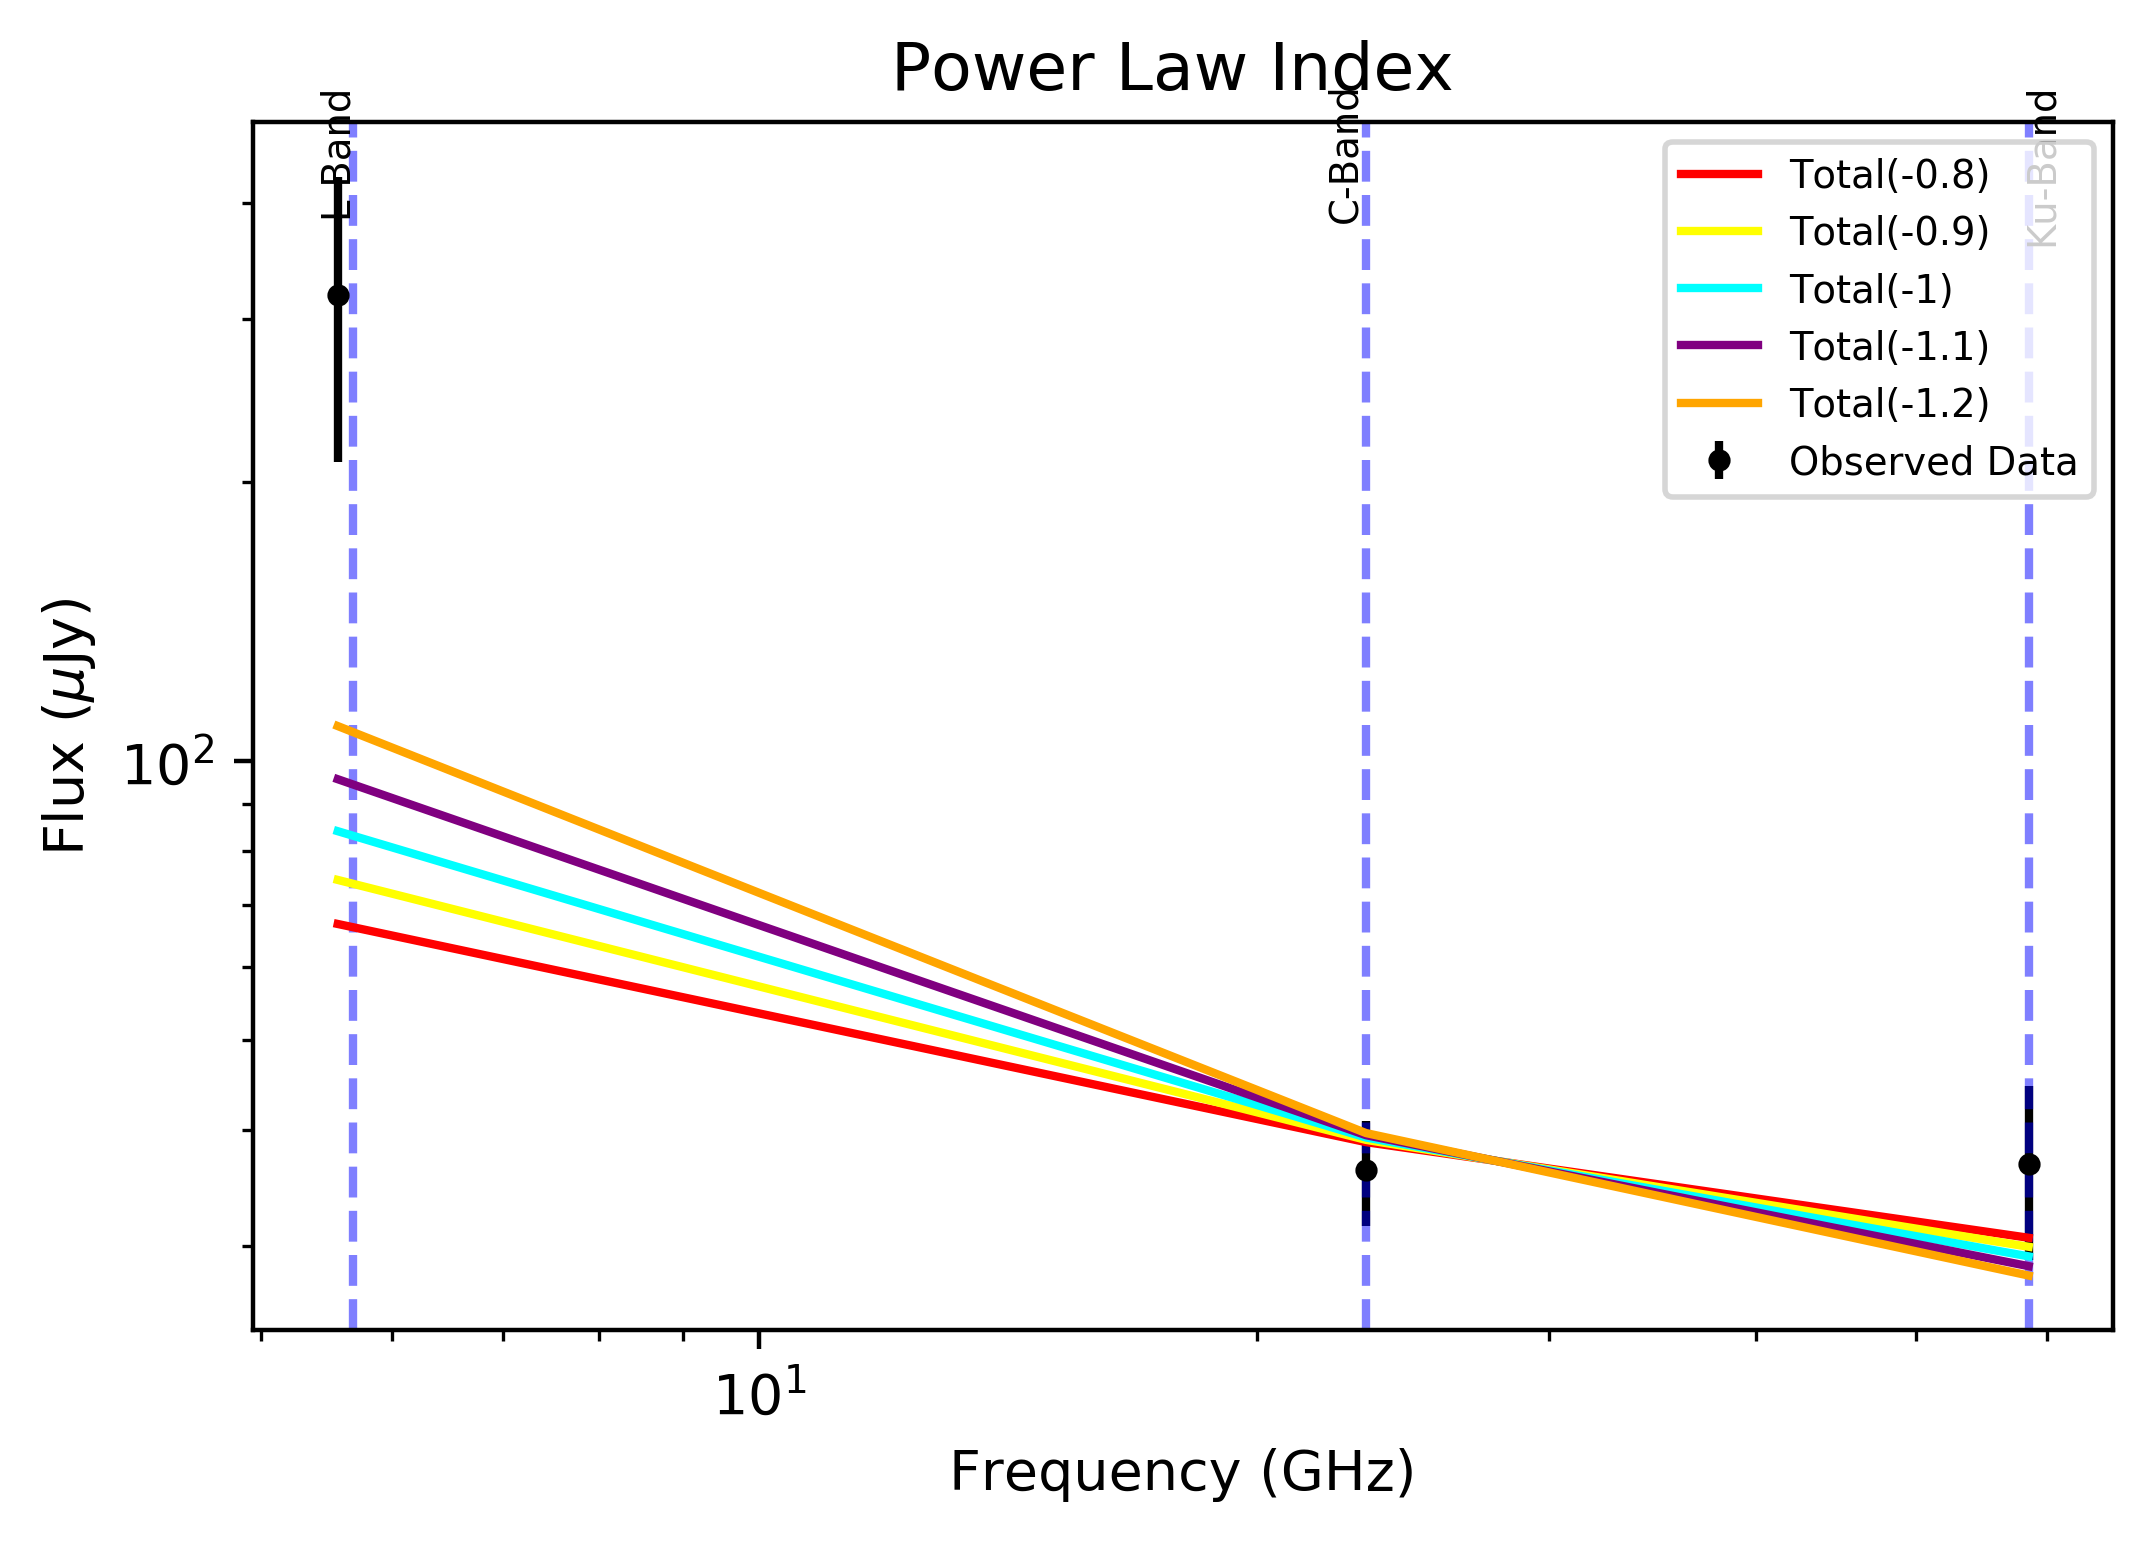

In [177]:
#Plotting the power law index to see the best fit, even though it has been shown to be the 
#exponent -1.2
%matplotlib inline
fig,ax=plt.subplots(ncols=1,nrows=1,dpi=400)

#plotting original data
ax.errorbar(rest_frequency,flux,error_flux,label='Observed Data',color='black',linestyle="",marker="o",markersize=3)

#Plotting lines to show the intersect of observed points
plt.axvline(x=23.2551888111,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=5.6794173,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=58.47651961,color='blue',linestyle='--',alpha=.5)
plt.text(22, 500, 'C-Band',fontsize='x-small',rotation=90)
plt.text(5.4, 500, 'L-Band',fontsize='x-small',rotation=90)
plt.text(58, 500, 'Ku-Band',fontsize='x-small',rotation=90)
#plotting different exponents of Non-thermal emission
ax.plot(rest_frequency,NT_FF_emission(results1.beta,rest_frequency),color='red', label='Total(-0.8)')
ax.plot(rest_frequency,NT_FF_emission_2(results2.beta,rest_frequency),color='Yellow', label='Total(-0.9)')
ax.plot(rest_frequency,NT_FF_emission_3(results3.beta,rest_frequency),color='aqua', label='Total(-1)')
ax.plot(rest_frequency,NT_FF_emission_4(results4.beta,rest_frequency),color='purple', label='Total(-1.1)')
ax.plot(rest_frequency,NT_FF_emission_5(results5.beta,rest_frequency),color='orange', label='Total(-1.2)')

#scaling
ax.set_yscale('log')
ax.set_xscale('log')
# Create legend.
ax.legend(loc='upper right', fontsize='x-small')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel(r'Flux ($\mu$Jy)')
plt.title('Power Law Index ')

Text(0.5, 1.0, 'Power Law Index: -0.8 Exponent')

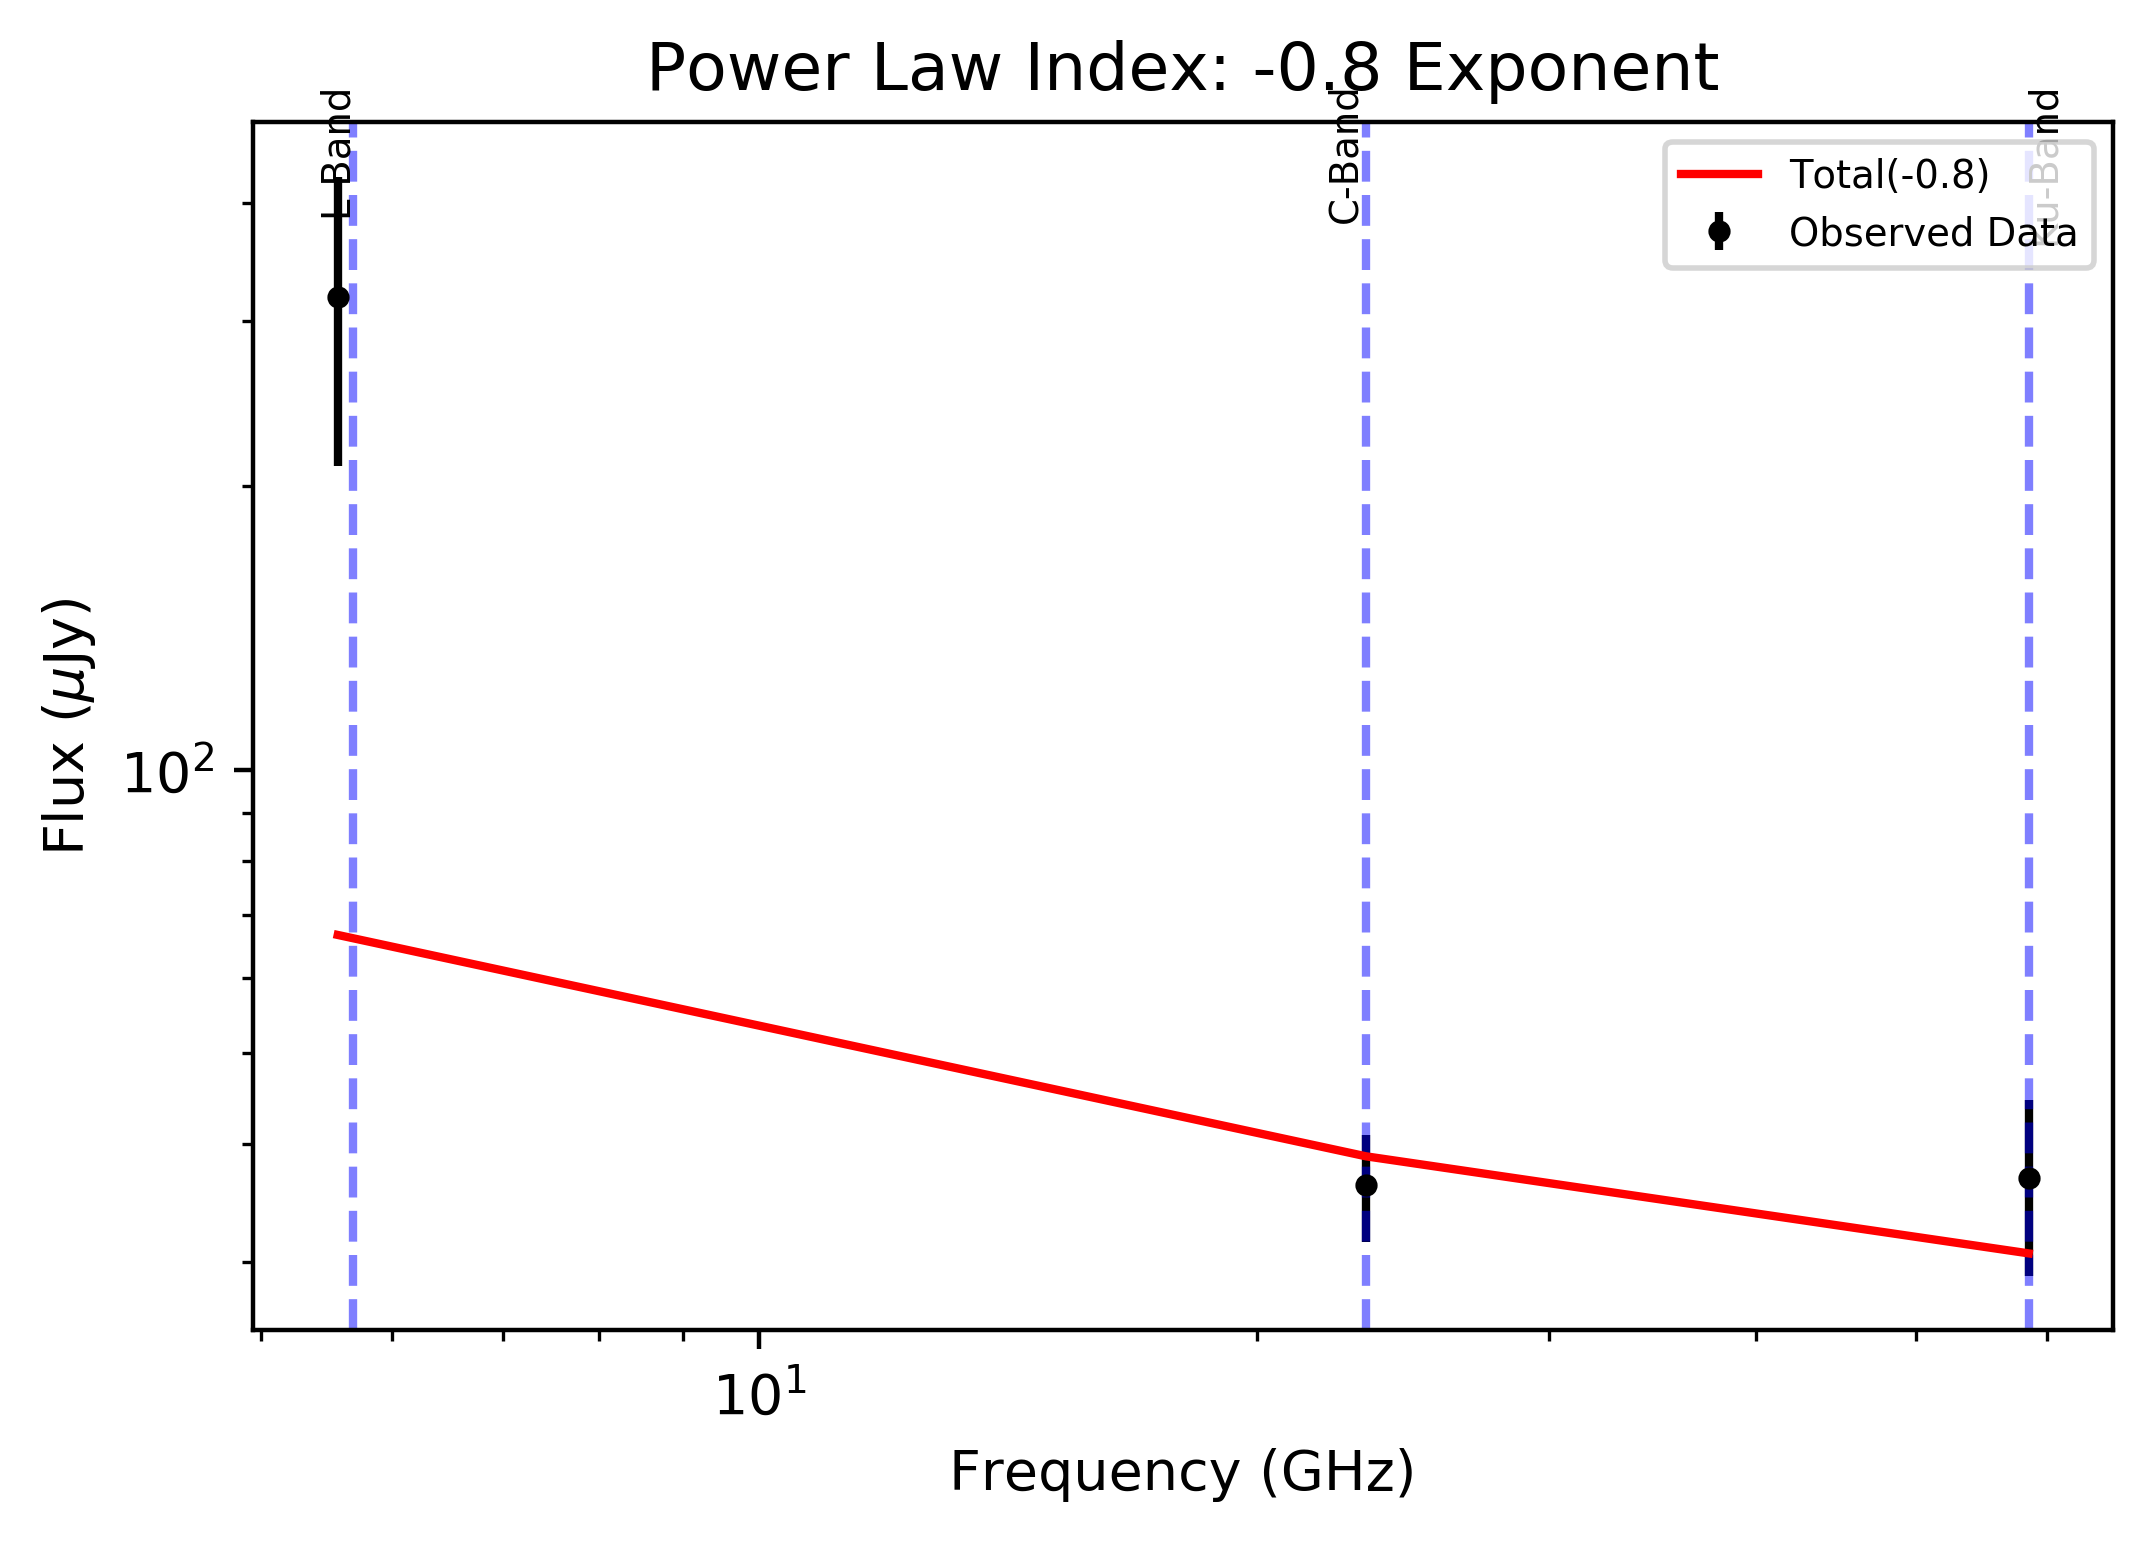

In [178]:
#Plotting -0.8 exponent
%matplotlib inline

# plotting all data files
fig,ax=plt.subplots(ncols=1,nrows=1,dpi=400)
#plotting original data
ax.errorbar(rest_frequency,flux,error_flux,label='Observed Data',color='black',linestyle="",marker="o",markersize=3)
#Plotting lines to show the intersect of power law and observed points
plt.axvline(x=23.2551888111,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=5.6794173,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=58.47651961,color='blue',linestyle='--',alpha=.5)
plt.text(22, 500, 'C-Band',fontsize='x-small',rotation=90)
plt.text(5.4, 500, 'L-Band',fontsize='x-small',rotation=90)
plt.text(58.2, 500, 'Ku-Band',fontsize='x-small',rotation=90)
#Plotting Dust subtracted data points 
#ax.errorbar(rest_frequency[0],Cband_dustsub,yerr=error_flux[0],color='black')
#ax.errorbar(rest_frequency[1],Lband_dustsub,yerr=error_flux[1],color='black')
#ax.errorbar(rest_frequency[2],Kuband_dustsub,yerr=error_flux[2],color='black')
#plotting different Non-thermal emission
ax.plot(rest_frequency,NT_FF_emission(results1.beta,rest_frequency),color='red', label='Total(-0.8)')
#scaling
ax.set_yscale('log')
ax.set_xscale('log')
# Create legend.
ax.legend(loc='upper right', fontsize='x-small')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel(r'Flux ($\mu$Jy)')
plt.title('Power Law Index: -0.8 Exponent')

Text(0.5, 1.0, 'Power Law Index: -0.9 Exponent')

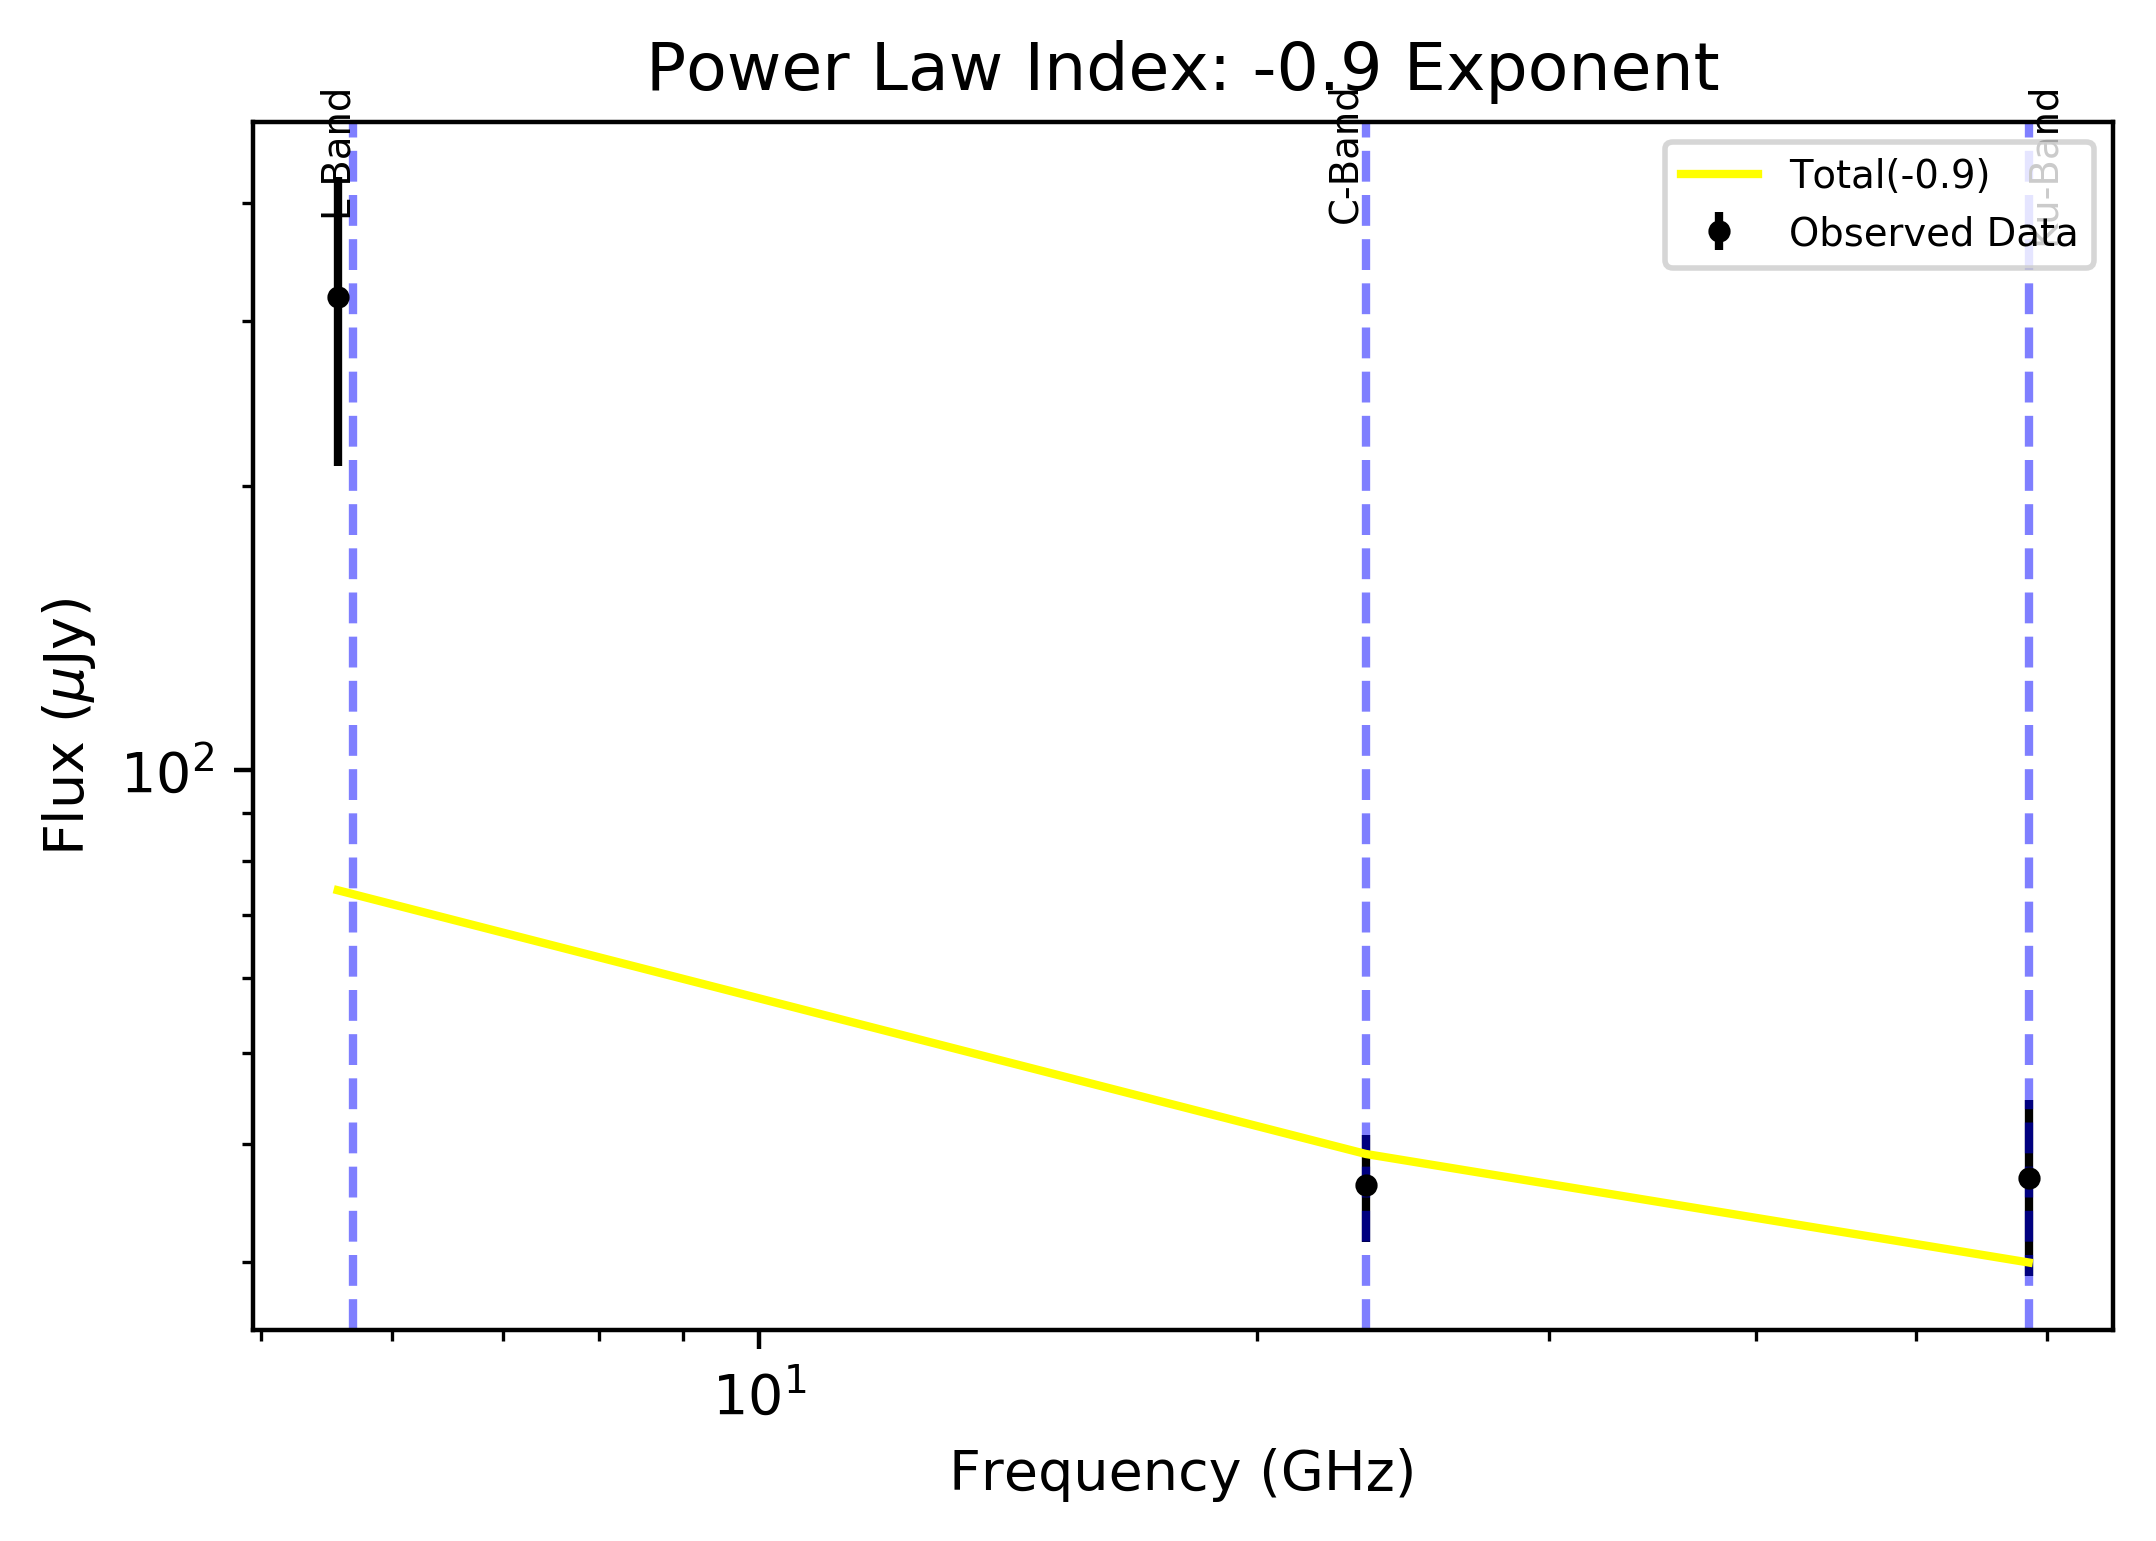

In [179]:
#Plotting -0.9 exponent
%matplotlib inline

# plotting all data files
fig,ax=plt.subplots(ncols=1,nrows=1,dpi=400)
#plotting original data
ax.errorbar(rest_frequency,flux,error_flux,label='Observed Data',color='black',linestyle="",marker="o",markersize=3)
#Plotting lines to show the intersect of power law and observed points
plt.axvline(x=23.2551888111,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=5.6794173,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=58.47651961,color='blue',linestyle='--',alpha=.5)
plt.text(22, 500, 'C-Band',fontsize='x-small',rotation=90)
plt.text(5.4, 500, 'L-Band',fontsize='x-small',rotation=90)
plt.text(58.2, 500, 'Ku-Band',fontsize='x-small',rotation=90)
#Plotting Dust subtracted data points 
#ax.errorbar(rest_frequency[0],Cband_dustsub,yerr=error_flux[0],color='black')
#ax.errorbar(rest_frequency[1],Lband_dustsub,yerr=error_flux[1],color='black')
#ax.errorbar(rest_frequency[2],Kuband_dustsub,yerr=error_flux[2],color='black')
#plotting different Non-thermal emission
ax.plot(rest_frequency,NT_FF_emission_2(results2.beta,rest_frequency),color='Yellow', label='Total(-0.9)')
#scaling
ax.set_yscale('log')
ax.set_xscale('log')
# Create legend.
ax.legend(loc='upper right', fontsize='x-small')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel(r'Flux ($\mu$Jy)')
plt.title('Power Law Index: -0.9 Exponent')

Text(0.5, 1.0, 'Power Law Index: -1 Exponent')

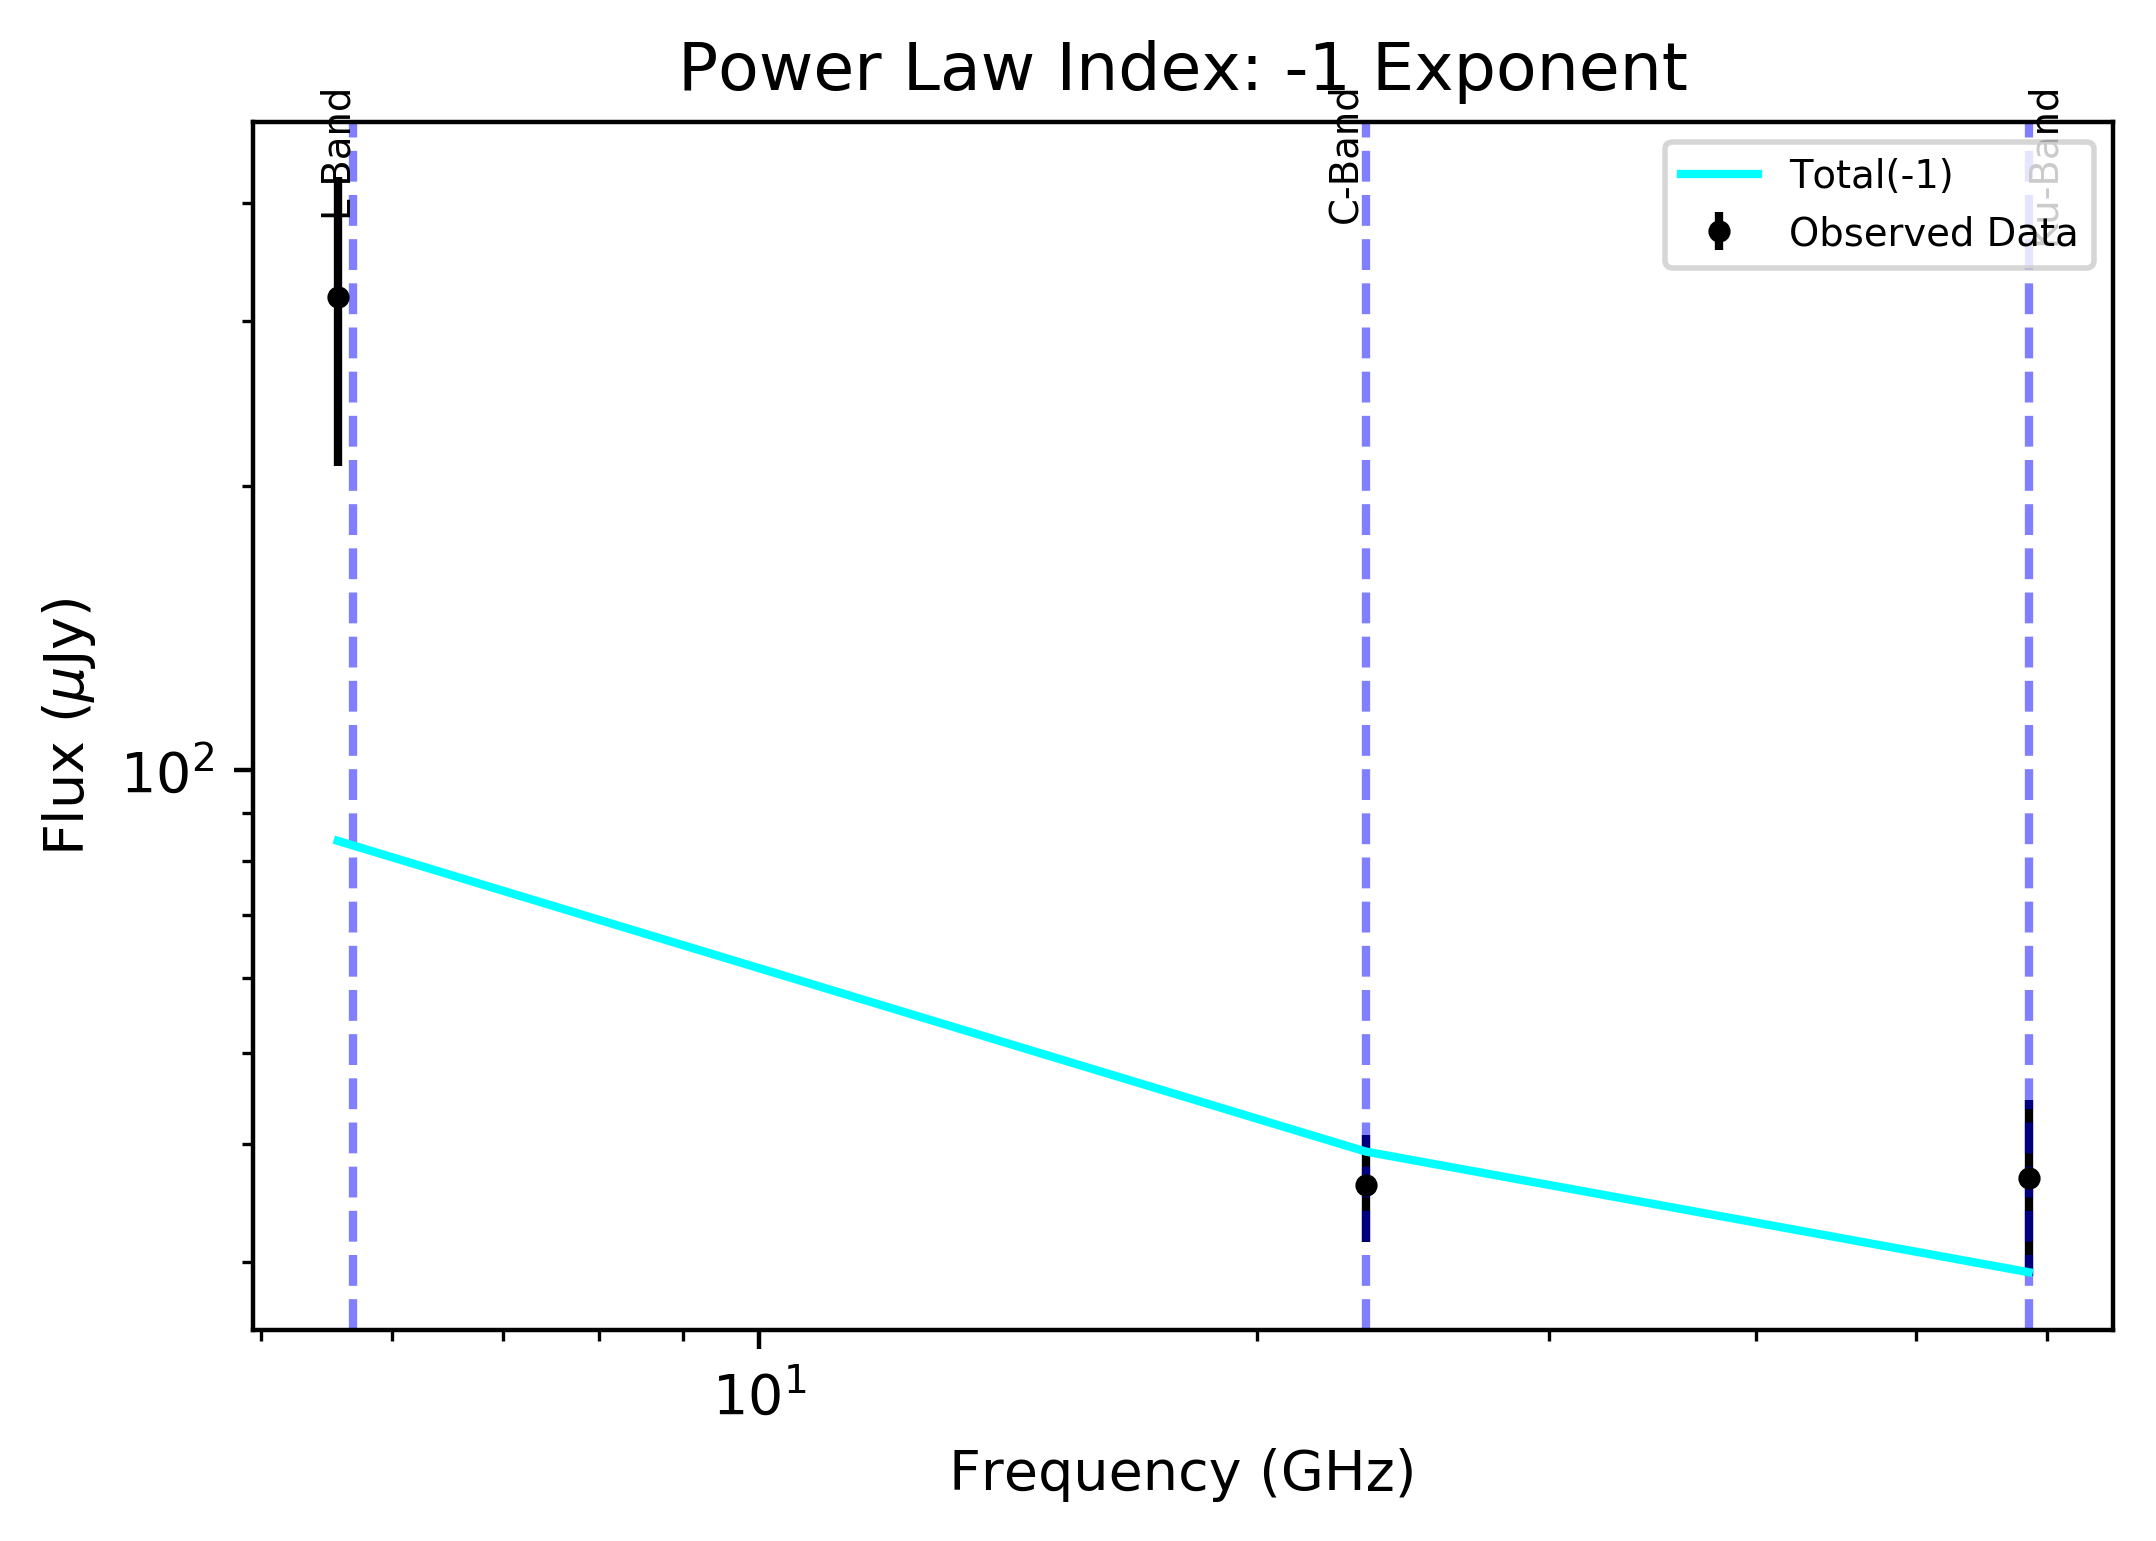

In [180]:
#Plotting -1.0 exponent
%matplotlib inline

# plotting all data files
fig,ax=plt.subplots(ncols=1,nrows=1,dpi=400)
#plotting original data
ax.errorbar(rest_frequency,flux,error_flux,label='Observed Data',color='black',linestyle="",marker="o",markersize=3)
#Plotting lines to show the intersect of power law and observed points
plt.axvline(x=23.2551888111,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=5.6794173,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=58.47651961,color='blue',linestyle='--',alpha=.5)
plt.text(22, 500, 'C-Band',fontsize='x-small',rotation=90)
plt.text(5.4, 500, 'L-Band',fontsize='x-small',rotation=90)
plt.text(58.2, 500, 'Ku-Band',fontsize='x-small',rotation=90)
#Plotting Dust subtracted data points 
#ax.errorbar(rest_frequency[0],Cband_dustsub,yerr=error_flux[0],color='black')
#ax.errorbar(rest_frequency[1],Lband_dustsub,yerr=error_flux[1],color='black')
#ax.errorbar(rest_frequency[2],Kuband_dustsub,yerr=error_flux[2],color='black')
#plotting different Non-thermal emission
ax.plot(rest_frequency,NT_FF_emission_3(results3.beta,rest_frequency),color='aqua', label='Total(-1)')
#scaling
ax.set_yscale('log')
ax.set_xscale('log')
# Create legend.
ax.legend(loc='upper right', fontsize='x-small')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel(r'Flux ($\mu$Jy)')
plt.title('Power Law Index: -1 Exponent')

Text(0.5, 1.0, 'Power Law Index: -1.1 Exponent')

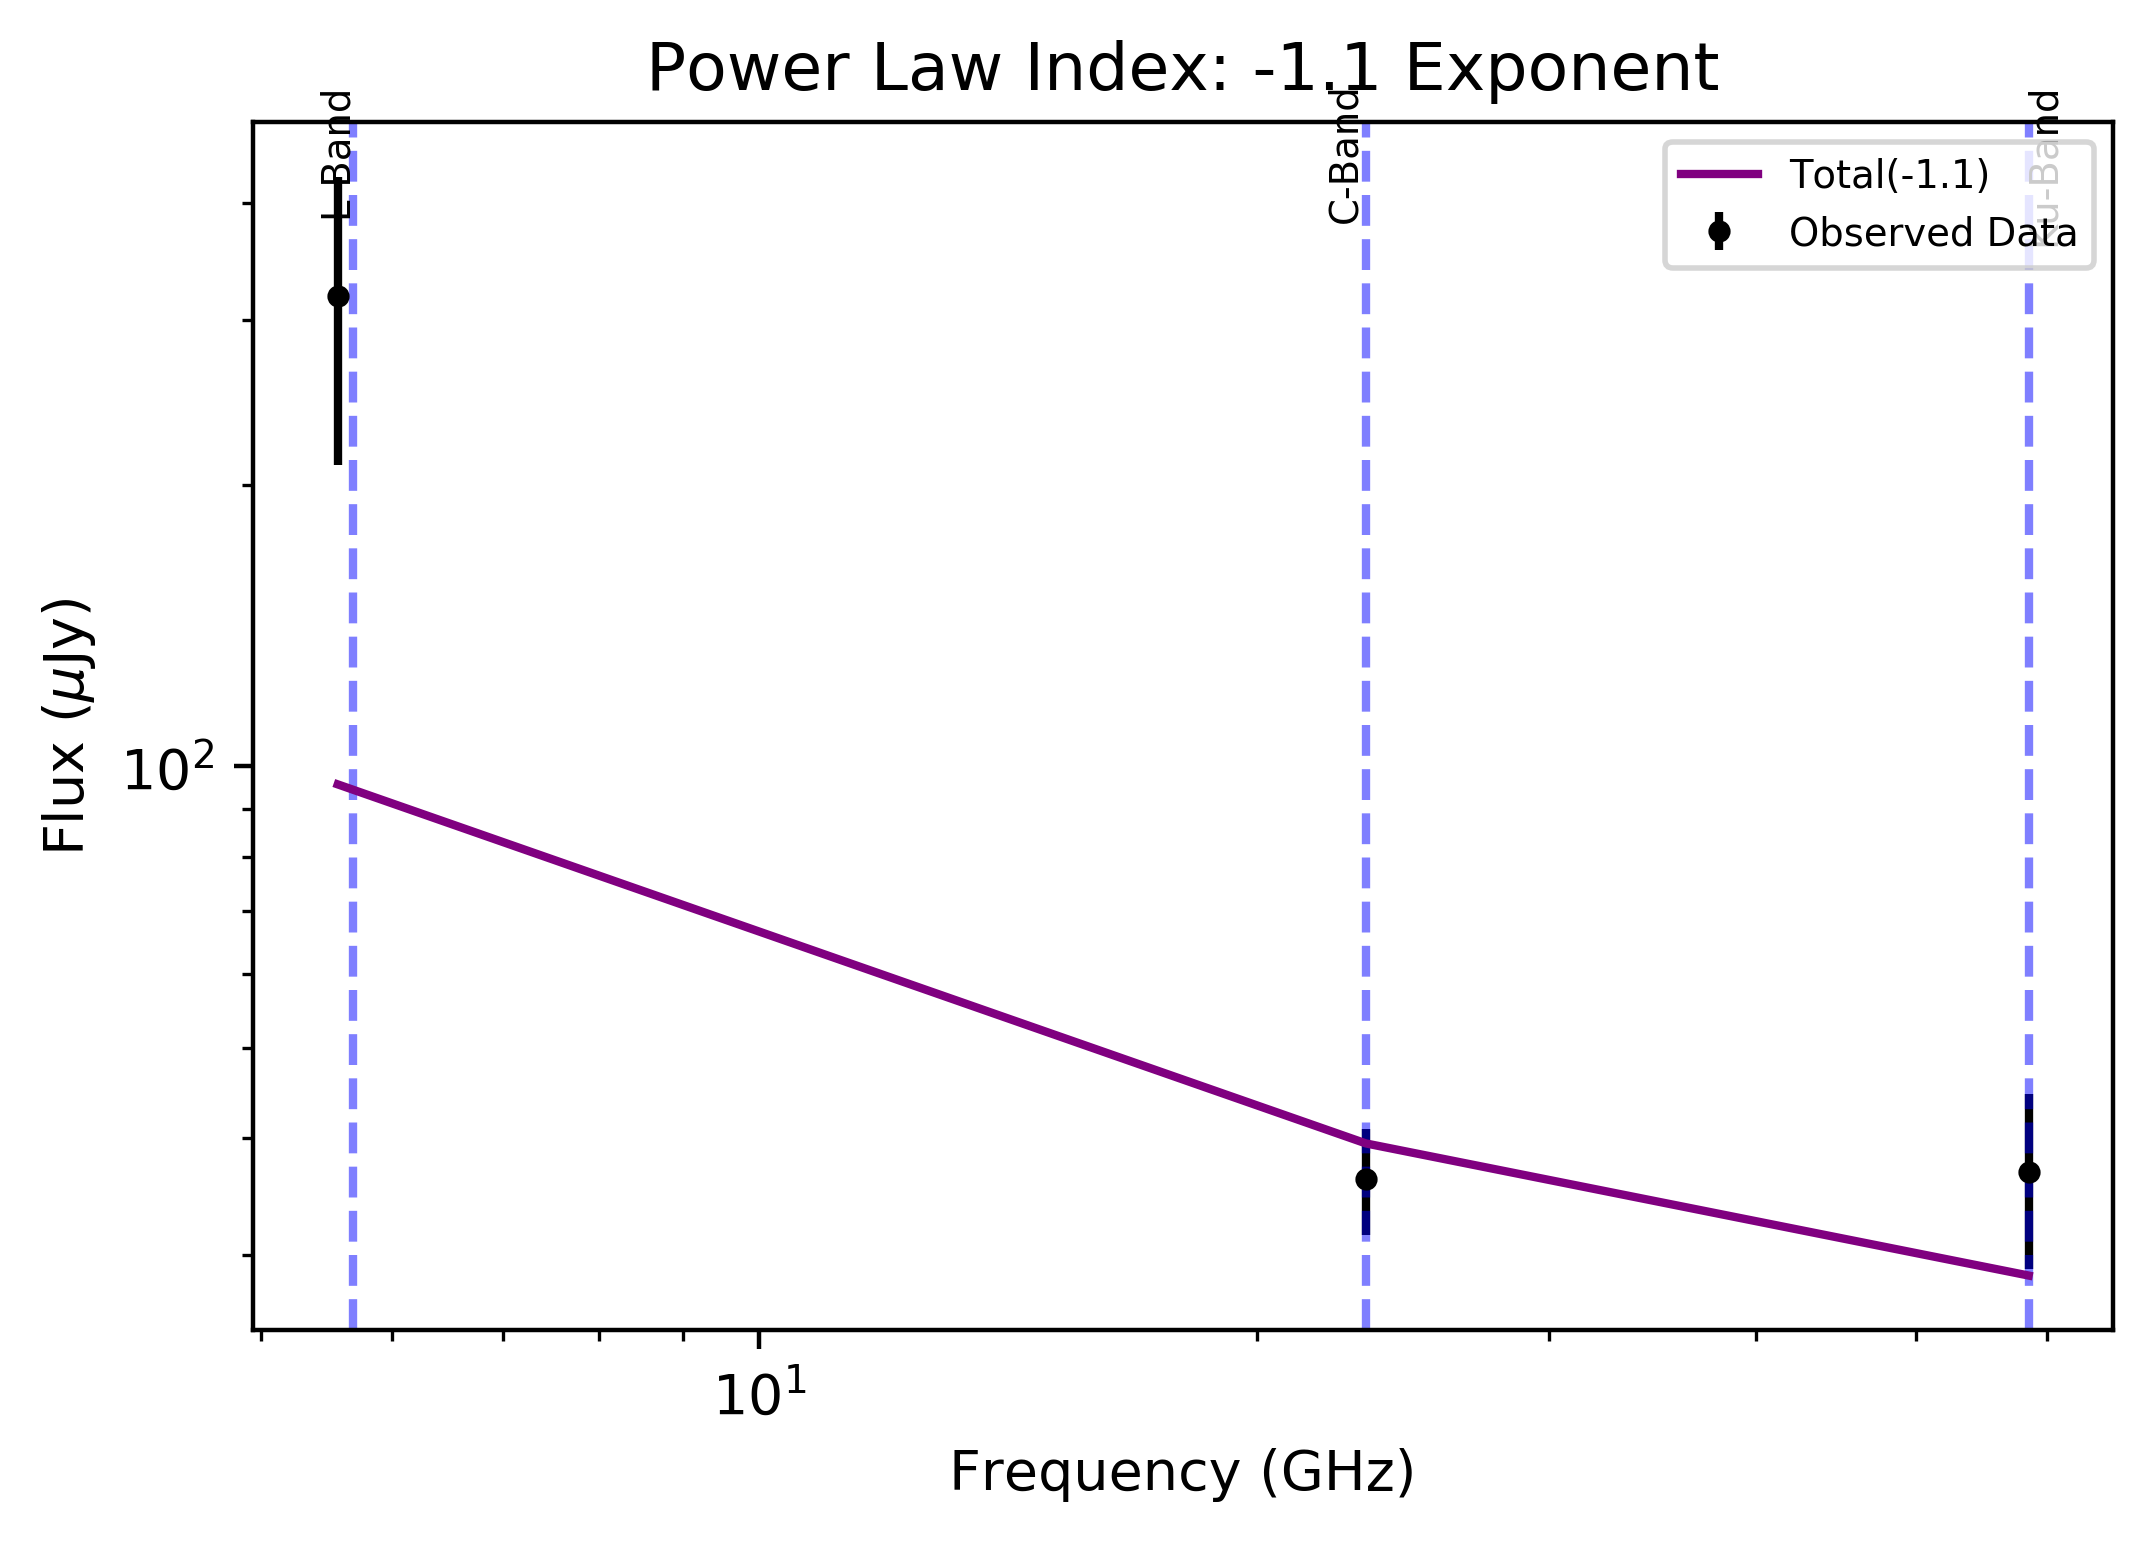

In [181]:
#Plotting -1.1 exponent
%matplotlib inline

# plotting all data files
fig,ax=plt.subplots(ncols=1,nrows=1,dpi=400)
#plotting original data
ax.errorbar(rest_frequency,flux,error_flux,label='Observed Data',color='black',linestyle="",marker="o",markersize=3)
#Plotting lines to show the intersect of power law and observed points
plt.axvline(x=23.2551888111,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=5.6794173,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=58.47651961,color='blue',linestyle='--',alpha=.5)
plt.text(22, 500, 'C-Band',fontsize='x-small',rotation=90)
plt.text(5.4, 500, 'L-Band',fontsize='x-small',rotation=90)
plt.text(58.2, 500, 'Ku-Band',fontsize='x-small',rotation=90)
#Plotting Dust subtracted data points 
#ax.errorbar(rest_frequency[0],Cband_dustsub,yerr=error_flux[0],color='black')
#ax.errorbar(rest_frequency[1],Lband_dustsub,yerr=error_flux[1],color='black')
#ax.errorbar(rest_frequency[2],Kuband_dustsub,yerr=error_flux[2],color='black')
#plotting different Non-thermal emission
ax.plot(rest_frequency,NT_FF_emission_4(results4.beta,rest_frequency),color='purple', label='Total(-1.1)')
#scaling
ax.set_yscale('log')
ax.set_xscale('log')
# Create legend.
ax.legend(loc='upper right', fontsize='x-small')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel(r'Flux ($\mu$Jy)')
plt.title('Power Law Index: -1.1 Exponent')

Text(0.5, 1.0, 'Power Law Index: -1.2 Exponent')

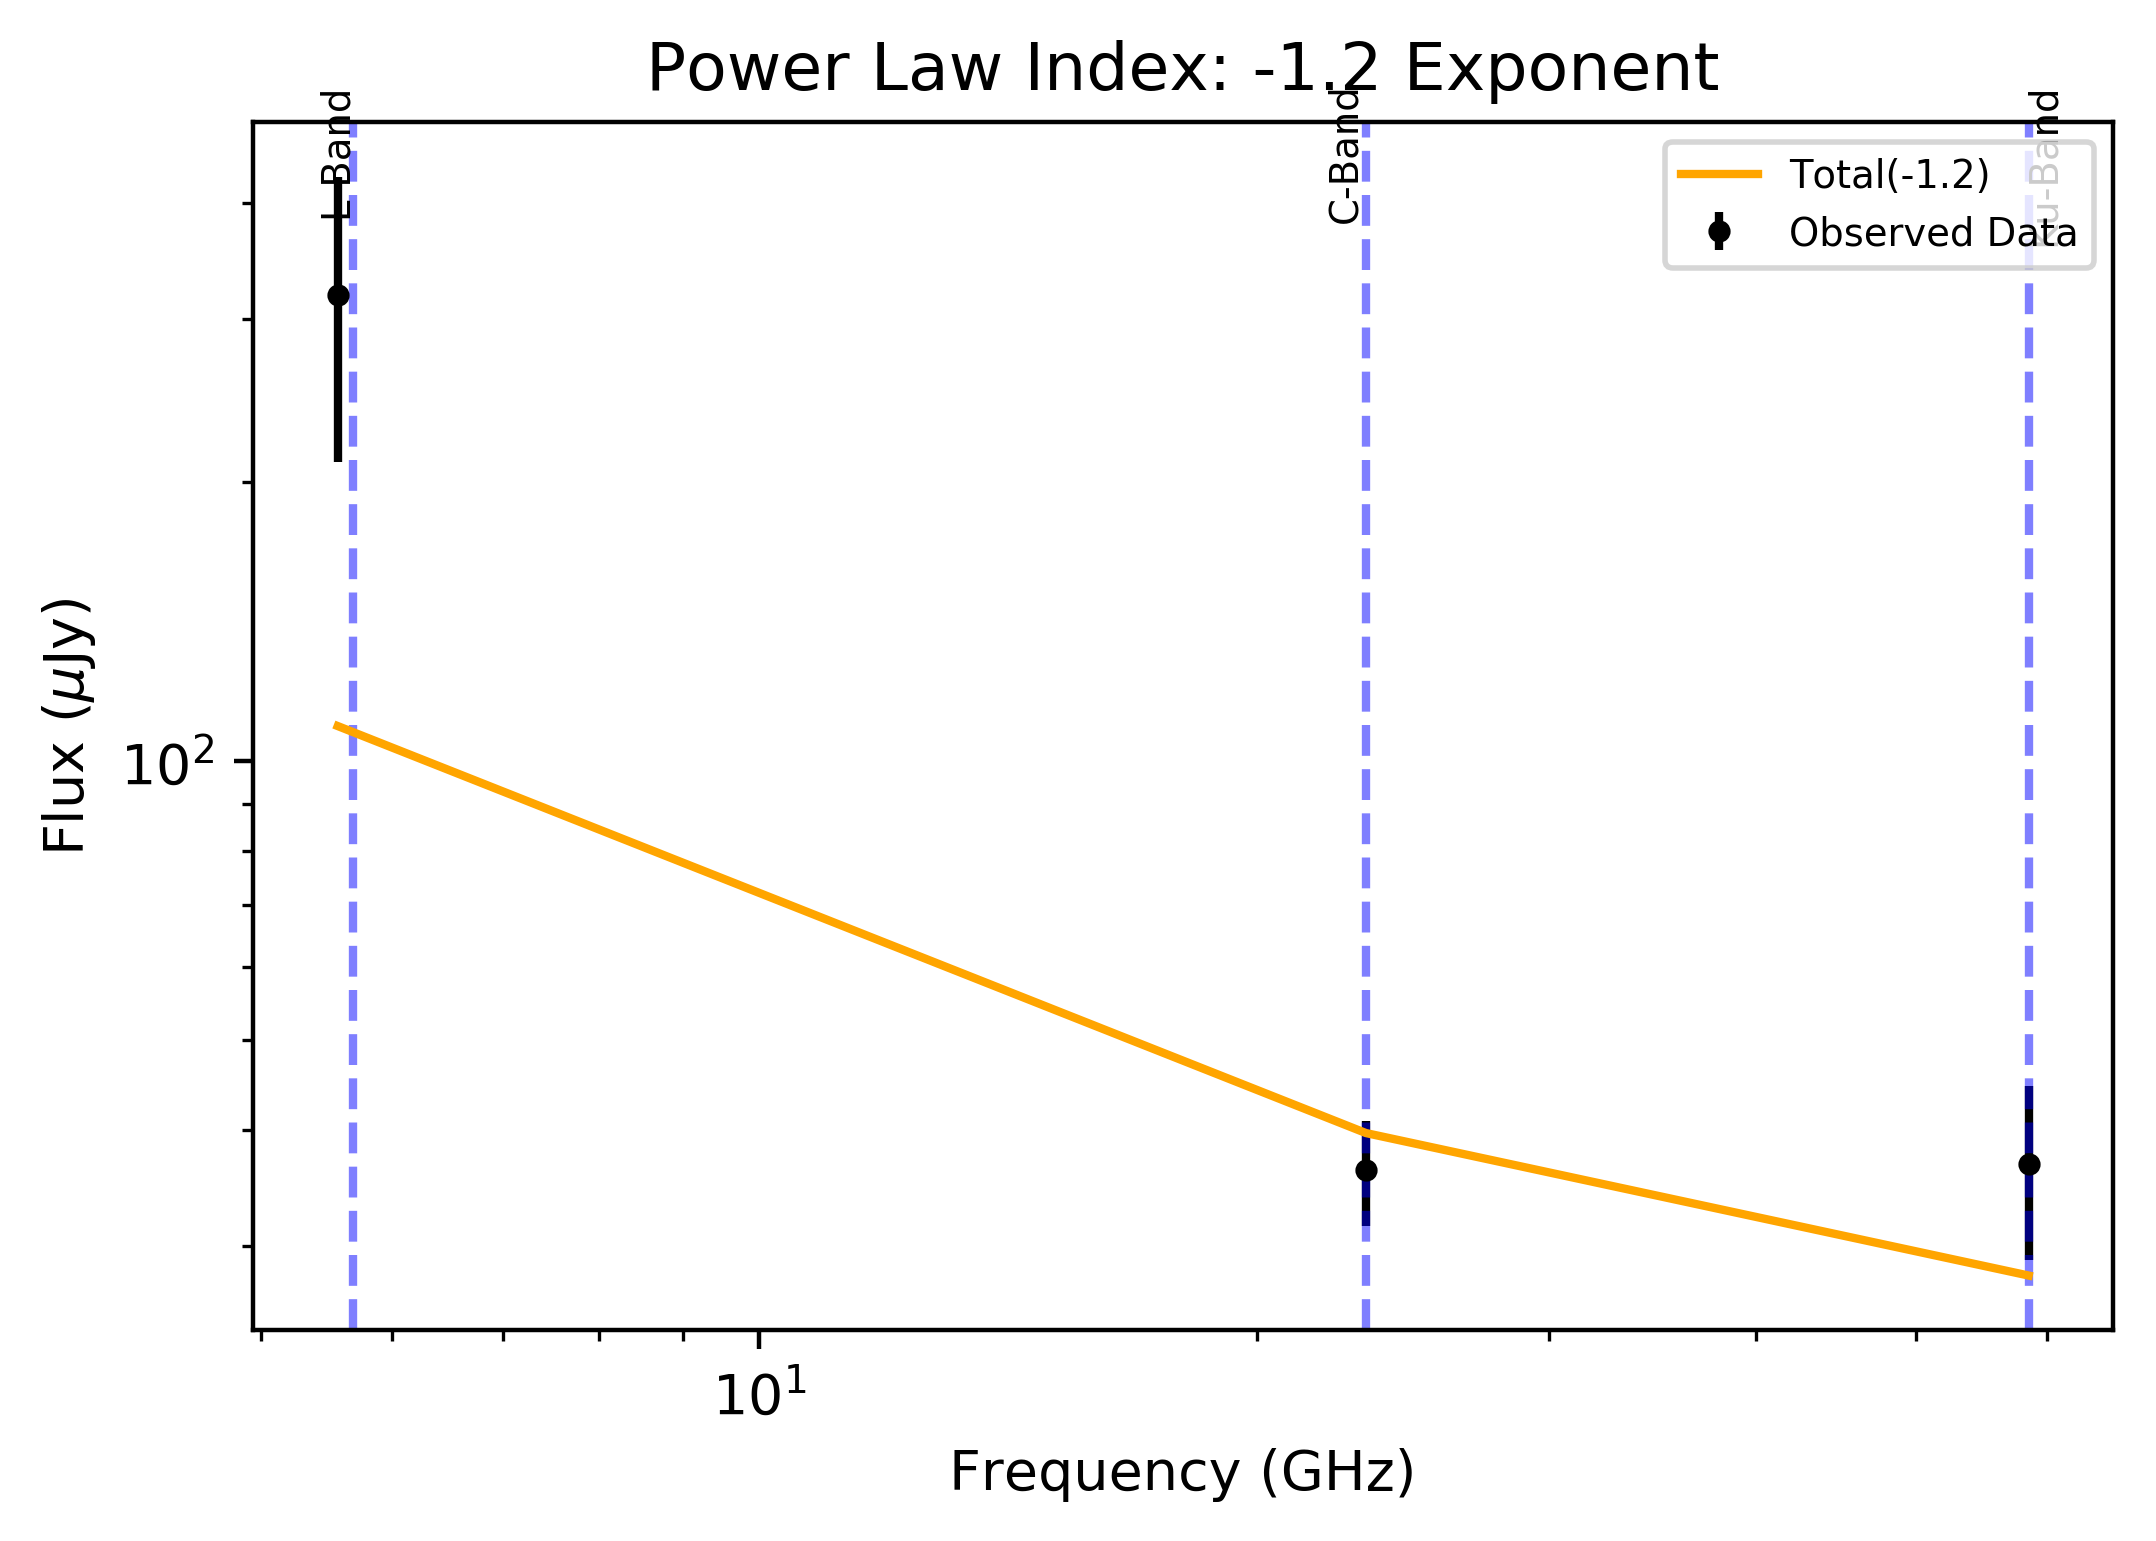

In [182]:
#Plotting -1.2 exponent
%matplotlib inline

# plotting all data files
fig,ax=plt.subplots(ncols=1,nrows=1,dpi=400)
#plotting original data
ax.errorbar(rest_frequency,flux,error_flux,label='Observed Data',color='black',linestyle="",marker="o",markersize=3)
#Plotting lines to show the intersect of power law and observed points
plt.axvline(x=23.2551888111,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=5.6794173,color='blue',linestyle='--',alpha=.5)
plt.axvline(x=58.47651961,color='blue',linestyle='--',alpha=.5)
plt.text(22, 500, 'C-Band',fontsize='x-small',rotation=90)
plt.text(5.4, 500, 'L-Band',fontsize='x-small',rotation=90)
plt.text(58.2, 500, 'Ku-Band',fontsize='x-small',rotation=90)
#Plotting Dust subtracted data points 
#ax.errorbar(rest_frequency[0],Cband_dustsub,yerr=error_flux[0],color='black')
#ax.errorbar(rest_frequency[1],Lband_dustsub,yerr=error_flux[1],color='black')
#ax.errorbar(rest_frequency[2],Kuband_dustsub,yerr=error_flux[2],color='black')
#plotting different Non-thermal emission
ax.plot(rest_frequency,NT_FF_emission_5(results5.beta,rest_frequency),color='orange', label='Total(-1.2)')
#scaling
ax.set_yscale('log')
ax.set_xscale('log')
# Create legend.
ax.legend(loc='upper right', fontsize='x-small')
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel(r'Flux ($\mu$Jy)')
plt.title('Power Law Index: -1.2 Exponent')

In [233]:
digitized_data=ascii.read("SWIRE3-14.csv")
digitized_data["Rest wave(m)"]=(digitized_data["Rest wave(um)"])*10**(-6)
digitized_data["FluxDensity"]=(digitized_data["Flux (Jy)"])*10**(6)
digitized_data["RestFrequency"]=c.c/(digitized_data["Rest wave(m)"])
digitized_data

Rest wave(um),Flux (Jy),header,Rest wave(m),FluxDensity,RestFrequency
,,,,,m / s
float64,float64,int64,float64,float64,float64
0.36,5.48e-05,--,3.6e-07,54.8,832756827777777.8
0.45,7.38e-05,--,4.5e-07,73.80000000000001,666205462222222.2
0.58,8.91e-05,--,5.8e-07,89.1,516883548275862.1
0.75,0.000134827,--,7.5e-07,134.827,399723277333333.3
1.0,0.000195351,--,1e-06,195.351,299792458000000.0
1.28,0.000224247,--,1.28e-06,224.247,234212857812500.0
1.65,0.000218726,--,1.6499999999999999e-06,218.726,181692398787878.8
2.12,0.000184779,--,2.12e-06,184.779,141411536792452.8


In [247]:
rest_wave=digitized_data.columns[3].data
flux_density=digitized_data.columns[4].data
rest_freq=(digitized_data.columns[5].data)*1e-9

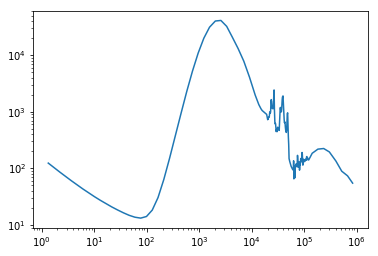

In [248]:
plt.loglog(rest_freq,flux_density)

In [249]:
#fitting the rayleigh jeans model to lower frequencies 
def SimpleRJ(x,f):
    return x[0]*f**x[1]

modelSRJ=odr.Model(SimpleRJ)

rayleigh_jean_fit = odr.Data(digitized_data["RestFrequency"].data,digitized_data["FluxDensity"].data)
odrfit1 = odr.ODR(rayleigh_jean_fit,modelSRJ,beta0=np.array([0.,4.]),maxit=10000)
results1 = odrfit1.run()
results1.pprint()

Beta: [1.95476166e-58 4.00000000e+00]
Beta Std Error: [1.06732897e-56 0.00000000e+00]
Beta Covariance: [[3.6243705e-120 0.0000000e+000]
 [0.0000000e+000 0.0000000e+000]]
Residual Variance: 31431420.197309215
Inverse Condition #: 1.0
Reason(s) for Halting:
  Problem is not full rank at solution
  Parameter convergence


In [250]:
#Reading in data gotten from data reduction
brisbin_data=ascii.read("Brisbin_swire3_14.csv") 
#Adding rest frequency to values (2.877 is the redshift found in Fan et al paper)
brisbin_data["Wavelength (m)"]=(brisbin_data.columns[0].data)*1e-6
brisbin_data["Flux(Jy)"]=(brisbin_data.columns[1].data)*1e-8
brisbin_data["Flux Error(Jy)"]=(brisbin_data.columns[2].data)*1e-8
brisbin_data["Frequency(GHz)"]=c.c/(brisbin_data.columns[4].data)
brisbin_data

﻿Wavelength (um),Flux (10^-18W m^-2),Flux Error,Wavelength (m),Flux(Jy),Flux Error(Jy),Frequency(GHz)
,,,,,,m / s
float64,float64,float64,float64,float64,float64,float64
6.2,5.7,1.3,6.2e-06,5.7e-08,1.3e-08,5259516807017544.0
7.7,24.9,4.3,7.699999999999999e-06,2.4899999999999997e-07,4.3e-08,1203985775100401.8
8.6,5.1,1.9,8.599999999999999e-06,5.1e-08,1.8999999999999998e-08,5878283490196078.0
11.2,3.7,1.2,1.12e-05,3.7e-08,1.2e-08,8102498864864865.0


In [251]:
#data from Brisbin et al paper 2015
brisbin_frequency=brisbin_data.columns[6].data
brisbin_flux=brisbin_data.columns[4].data
brisbin_flux_error=brisbin_data.columns[5].data

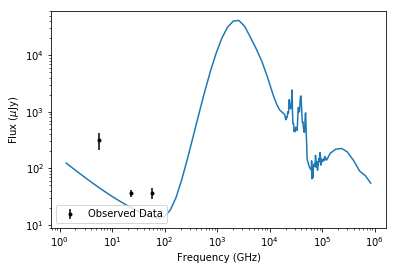

In [253]:
#This line is because some of my plotting isnt working so inline helps
%matplotlib inline

#Plot intial points found with my data reduction
fig,ax=plt.subplots(ncols=1,nrows=1)
#ax.errorbar(brisbin_frequency,brisbin_flux,yerr=brisbin_flux_error,label='data',fmt= "ro",markersize=5)
ax.errorbar(rest_frequency,flux,error_flux,label='Observed Data',color='black',linestyle="",marker="o",markersize=3)
plt.plot(rest_freq,flux_density)
#Add labels to axis and log scales plot, also put legand in lower left corner
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Flux ($\mu$Jy)')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc='lower left')